In [1]:
# import the required libraries
import numpy as np
import scipy.stats
import functools
import pandas as pd
import argparse
import scipy as sc
import numpy.matlib as npm
import sys
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def compute_ci(data):

    n = data.shape[1]
    se = scipy.stats.sem(data, axis = 0)
    h = se * scipy.stats.t.ppf(1.95 / 2., n-1)
    return h

In [3]:
def lag_fig(xmapy_surr, ymapx_surr, xmapy, ymapx, x_name, y_name):
    x = np.arange(-10,11)

    mean_xmapy = xmapy.mean(axis = 0)
    mean_ymapx = ymapx.mean(axis = 0)
    
    mean_xmapy_surr = xmapy_surr.mean(axis = 0)
    mean_ymapx_surr = ymapx_surr.mean(axis = 0)

    ci_xmapy = compute_ci(xmapy)
    ci_ymapx = compute_ci(ymapx)
    
    ci_xmapy_surr = compute_ci(xmapy_surr)
    ci_ymapx_surr = compute_ci(ymapx_surr)

    fig, axs = plt.subplots(figsize = (8,6))
    

    axs.plot(x, mean_xmapy, 'C0-', label= y_name + r'$\rightarrow$' + x_name)
    axs.plot(x, xmapy_surr.mean(axis = 0), 'C0--', label = y_name + r'$\rightarrow$' + x_name + ' surrogate')
    axs.fill_between(x, mean_xmapy - ci_xmapy, mean_xmapy + ci_xmapy, color='C0', alpha=0.2)
    axs.fill_between(x, xmapy_surr.mean(axis = 0) - ci_xmapy_surr, xmapy_surr.mean(axis = 0) + ci_xmapy_surr, color='C0', alpha=0.1)

    axs.plot(x, mean_ymapx, 'C1-', label= x_name + r'$\rightarrow$' + y_name)
    axs.plot(x, ymapx_surr.mean(axis = 0), 'C1--', label = x_name + r'$\rightarrow$' + y_name + ' surrogate')
    axs.fill_between(x, mean_ymapx - ci_ymapx, mean_ymapx + ci_ymapx, color='C1', alpha=0.2)
    axs.fill_between(x, ymapx_surr.mean(axis = 0) - ci_ymapx_surr, ymapx_surr.mean(axis = 0) + ci_ymapx_surr, color='C1', alpha=0.1)

    axs.set_xticks(x)
    axs.grid(linestyle = '--', alpha = 0.5)

    axs.set_ylabel(r'$\rho$', rotation = 0)
    axs.set_xlabel(r'$\tau$')
    #plt.title('Correlation vs Lag')
    plt.legend(loc = 4)
    #plt.savefig('para_didi.png', dpi=300)

    return axs

In [13]:
noint_seas40 = np.load('WeakBi05.npy')
noint_seas60 = np.load('WeakBi10.npy')
noint_seas80 = np.load('WeakBi20.npy')
# noint_seas120 = np.load('WeakUniSeas15.npy')

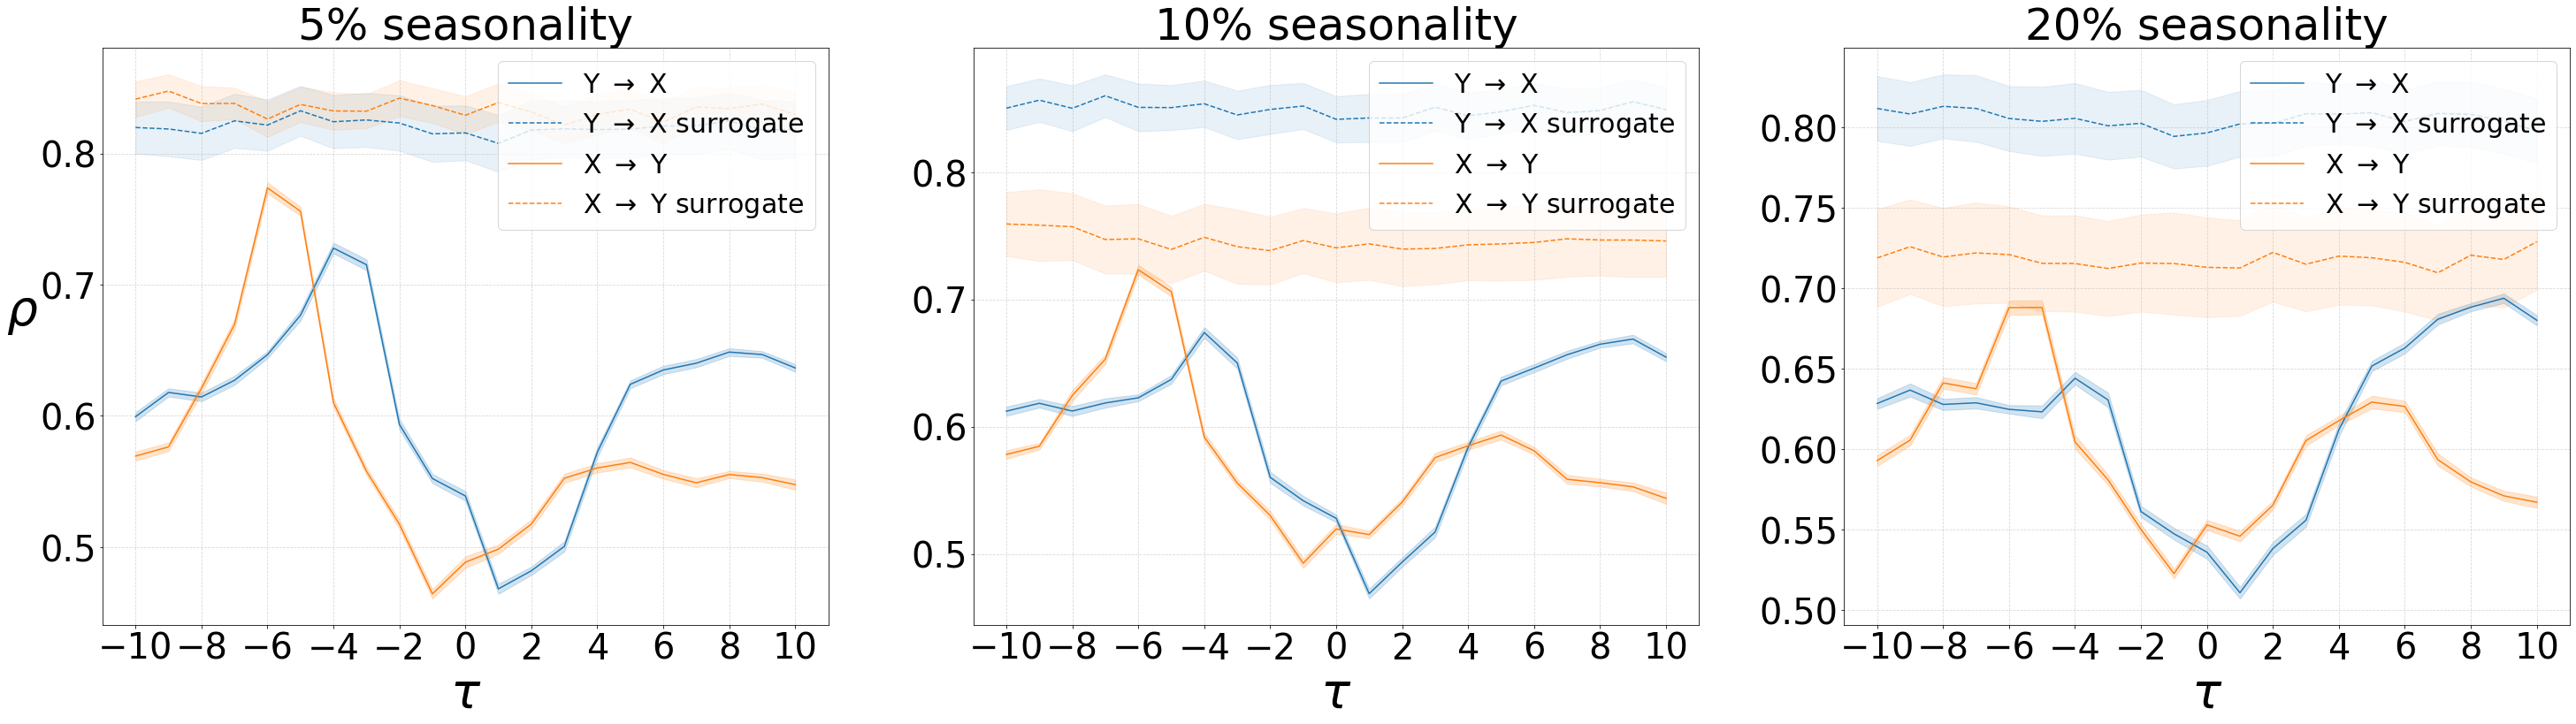

In [14]:
x_axis = np.arange(-10,11)
x_ticks = np.arange(-10,11,2)


# set up grid for plots
fig, axs = plt.subplots(figsize = (50,12), nrows = 1, ncols = 3, sharex = False, sharey = False)


#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=50)     # fontsize of the axes title
plt.rc('axes', labelsize=50)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=40)    # fontsize of the tick labels
plt.rc('ytick', labelsize=40)    # fontsize of the tick labels
plt.rc('legend', fontsize=30)    # legend fontsize
plt.rc('figure', titlesize=40)


array1 = noint_seas40 

xmapy_surr1 = array1[:,:,0]
ymapx_surr1 = array1[:,:,1]
xmapy1 = array1[:,:,2]
ymapx1 = array1[:,:,3]

# plot figures
mean_xy1 = xmapy1.mean(axis = 0)
mean_yx1 = ymapx1.mean(axis = 0)
ci_xy1 = compute_ci(xmapy1)
ci_yx1 = compute_ci(ymapx1)

mean_xy_surr1 = xmapy_surr1.mean(axis = 0)
mean_yx_surr1 = ymapx_surr1.mean(axis = 0)
ci_xy_surr1 = compute_ci(xmapy_surr1)
ci_yx_surr1 = compute_ci(ymapx_surr1)

axs[0].plot(x_axis, mean_xy1, 'C0-', label= r'Y $\rightarrow$ X')
axs[0].plot(x_axis, mean_xy_surr1, 'C0--', label = r'Y $\rightarrow$ X surrogate')
axs[0].fill_between(x_axis, mean_xy1 - ci_xy1, mean_xy1 + ci_xy1, color='C0', alpha=0.2)
axs[0].fill_between(x_axis, mean_xy_surr1 - ci_xy_surr1, mean_xy_surr1 + ci_xy_surr1, color='C0', alpha=0.1)

axs[0].plot(x_axis, mean_yx1, 'C1-', label= r'X $\rightarrow$ Y')
axs[0].plot(x_axis, mean_yx_surr1, 'C1--', label = r'X $\rightarrow$ Y surrogate')
axs[0].fill_between(x_axis, mean_yx1 - ci_yx1, mean_yx1 + ci_yx1, color='C1', alpha=0.2)
axs[0].fill_between(x_axis, mean_yx_surr1 - ci_yx_surr1, mean_yx_surr1 + ci_yx_surr1, color='C1', alpha=0.1)


axs[0].set_xticks(x_ticks)
axs[0].grid(linestyle = '--', alpha = 0.5)

array2 = noint_seas60 

xmapy_surr2 = array2[:,:,0]
ymapx_surr2 = array2[:,:,1]
xmapy2 = array2[:,:,2]
ymapx2 = array2[:,:,3]

# plot figures
mean_xy2 = xmapy2.mean(axis = 0)
mean_yx2 = ymapx2.mean(axis = 0)
ci_xy2 = compute_ci(xmapy2)
ci_yx2 = compute_ci(ymapx2)

mean_xy_surr2 = xmapy_surr2.mean(axis = 0)
mean_yx_surr2 = ymapx_surr2.mean(axis = 0)
ci_xy_surr2 = compute_ci(xmapy_surr2)
ci_yx_surr2 = compute_ci(ymapx_surr2)

axs[1].plot(x_axis, mean_xy2, 'C0-', label= r'Y $\rightarrow$ X')
axs[1].plot(x_axis, mean_xy_surr2, 'C0--', label = r'Y $\rightarrow$ X surrogate')
axs[1].fill_between(x_axis, mean_xy2 - ci_xy2, mean_xy2 + ci_xy2, color='C0', alpha=0.2)
axs[1].fill_between(x_axis, mean_xy_surr2 - ci_xy_surr2, mean_xy_surr2 + ci_xy_surr2, color='C0', alpha=0.1)

axs[1].plot(x_axis, mean_yx2, 'C1-', label= r'X $\rightarrow$ Y')
axs[1].plot(x_axis, mean_yx_surr2, 'C1--', label = r'X $\rightarrow$ Y surrogate')
axs[1].fill_between(x_axis, mean_yx2 - ci_yx2, mean_yx2 + ci_yx2, color='C1', alpha=0.2)
axs[1].fill_between(x_axis, mean_yx_surr2 - ci_yx_surr2, mean_yx_surr2 + ci_yx_surr2, color='C1', alpha=0.1)

axs[1].set_xticks(x_ticks)
axs[1].grid(linestyle = '--', alpha = 0.5)


array3 = noint_seas80 

xmapy_surr3 = array3[:,:,0]
ymapx_surr3 = array3[:,:,1]
xmapy3 = array3[:,:,2]
ymapx3 = array3[:,:,3]

# plot figures
mean_xy3 = xmapy3.mean(axis = 0)
mean_yx3 = ymapx3.mean(axis = 0)
ci_xy3 = compute_ci(xmapy3)
ci_yx3 = compute_ci(ymapx3)

mean_xy_surr3 = xmapy_surr3.mean(axis = 0)
mean_yx_surr3 = ymapx_surr3.mean(axis = 0)
ci_xy_surr3 = compute_ci(xmapy_surr3)
ci_yx_surr3 = compute_ci(ymapx_surr3)

axs[2].plot(x_axis, mean_xy3, 'C0-', label= r'Y $\rightarrow$ X')
axs[2].plot(x_axis, mean_xy_surr3, 'C0--', label = r'Y $\rightarrow$ X surrogate')
axs[2].fill_between(x_axis, mean_xy3 - ci_xy3, mean_xy3 + ci_xy3, color='C0', alpha=0.2)
axs[2].fill_between(x_axis, mean_xy_surr3 - ci_xy_surr3, mean_xy_surr3 + ci_xy_surr3, color='C0', alpha=0.1)

axs[2].plot(x_axis, mean_yx3, 'C1-', label= r'X $\rightarrow$ Y')
axs[2].plot(x_axis, mean_yx_surr3, 'C1--', label = r'X $\rightarrow$ Y surrogate')
axs[2].fill_between(x_axis, mean_yx3 - ci_yx3, mean_yx3 + ci_yx3, color='C1', alpha=0.2)
axs[2].fill_between(x_axis, mean_yx_surr3 - ci_yx_surr3, mean_yx_surr3 + ci_yx_surr3, color='C1', alpha=0.1)

axs[2].set_xticks(x_ticks)
axs[2].grid(linestyle = '--', alpha = 0.5)


# array4 = noint_seas120

# xmapy_surr4 = array4[:,:,0]
# ymapx_surr4 = array4[:,:,1]
# xmapy4 = array4[:,:,2]
# ymapx4 = array4[:,:,3]

# # plot figures
# mean_xy4 = xmapy4.mean(axis = 0)
# mean_yx4 = ymapx4.mean(axis = 0)
# ci_xy4 = compute_ci(xmapy4)
# ci_yx4 = compute_ci(ymapx4)

# mean_xy_surr4 = xmapy_surr4.mean(axis = 0)
# mean_yx_surr4 = ymapx_surr4.mean(axis = 0)
# ci_xy_surr4 = compute_ci(xmapy_surr4)
# ci_yx_surr4 = compute_ci(ymapx_surr4)

# axs[1,1].plot(x_axis, mean_xy4, 'C0-', label= r'Y $\rightarrow$ X')
# axs[1,1].plot(x_axis, mean_xy_surr4, 'C0--', label = r'Y $\rightarrow$ X surrogate')
# axs[1,1].fill_between(x_axis, mean_xy4 - ci_xy4, mean_xy4 + ci_xy4, color='C0', alpha=0.2)
# axs[1,1].fill_between(x_axis, mean_xy_surr4 - ci_xy_surr4, mean_xy_surr4 + ci_xy_surr4, color='C0', alpha=0.1)

# axs[1,1].plot(x_axis, mean_yx4, 'C1-', label= r'X $\rightarrow$ Y')
# axs[1,1].plot(x_axis, mean_yx_surr4, 'C1--', label = r'X $\rightarrow$ Y surrogate')
# axs[1,1].fill_between(x_axis, mean_yx4 - ci_yx4, mean_yx4 + ci_yx4, color='C1', alpha=0.2)
# axs[1,1].fill_between(x_axis, mean_yx_surr4 - ci_yx_surr4, mean_yx_surr4 + ci_yx_surr4, color='C1', alpha=0.1)

# axs[1,1].set_xticks(x_ticks)
# axs[1,1].grid(linestyle = '--', alpha = 0.5)



axs[0].legend(loc = 1)
axs[1].legend(loc = 1)
axs[2].legend(loc = 1)
#axs[1,1].legend(loc = 1)


axs[0].title.set_text('5% seasonality')
axs[1].title.set_text('10% seasonality')
axs[2].title.set_text('20% seasonality')
#axs[1,1].title.set_text('150% seasonality')

axs[0].set_xlabel(r"$\tau$", fontsize = 55)
axs[1].set_xlabel(r"$\tau$", fontsize = 55)
axs[2].set_xlabel(r"$\tau$", fontsize = 55)
#axs[1,1].set_xlabel(r"$\tau$", fontsize = 55)


axs[0].set_ylabel(r"$\rho$", rotation = 0, fontsize = 55, labelpad = 20)
#axs[0,1].set_ylabel(r"$\rho$", rotation = 0, fontsize = 55, labelpad = 20)
#axs[1,0].set_ylabel(r"$\rho$", rotation = 0, fontsize = 55, labelpad = 20)
#axs[1,1].set_ylabel(r"$\rho$", rotation = 0, fontsize = 55, labelpad = 20)


# optionally save figures after plotting
#plt.savefig('weakbi_seas.png', dpi=300, bbox_inches='tight')
plt.show()